<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پنهان در بافت
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    توضیحات
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین قصد داریم تا با استفاده از فیلترگابور که در تمرینات قبلی با آن آشنا شدیم، اشیائی را در تصویر شناسایی کنیم. در ادامه با جزئیات این تمرین آشنا خواهیم شد.
</font>
</p>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله اول: یافتن گربه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله از تمرین باید یک گربه را که در تصویر پنهان شده است، نمایان کنید. در ادامه با بخش های مختلف این مرحله آشنا خواهید شد.
</font>
</p>

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش اول: وارد کردن تصویر
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدا تصویر را زیر را وارد کنید. دقت کنید که تصویر را در حوزه خاکستری باید بخوانید.
<br>
data/cat.png
<br>
دقت کنید که در این تصویر یک گربه پنهان شده است. در این مرحله هنوز قادر به مشاهده ای شی در تصویر نیستیم. در ادامه با انجام عملیات خاصی این شی شناسایی خواهد شد.
</font>
</p>

In [3]:
img = cv2.imread('data/cat.png', cv2.IMREAD_GRAYSCALE)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش دوم: اعمال فیلتر گابور
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال باید یک فیلتر گابور را بر تصویر خود اعمال کنید. توجه کنید که فیلتر گابور دارای پارامترهای زیادی است. بخشی از پارامترها به واسطه ما تعیین شده اند. بخش دیگر برعهده شما است که مقدار آن را تعیین کنید و ببنید که با کدام ترکیب پارامترها گربه پنهان شده بهتر ظاهر می شود.
</font>
</p>

$$\text{kernel size} = [10 \times 10, 15 \times 15]$$
$$\sigma = [6, 7, 8]$$
$$\theta = 0$$
$$\lambda = 5$$
$$\gamma = 0.2 \times 0.9$$

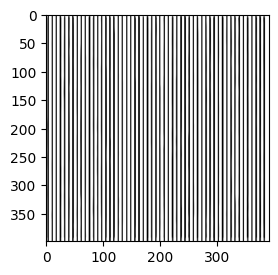

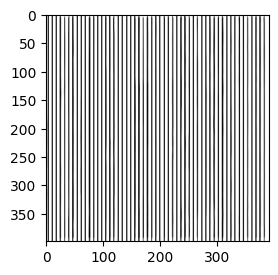

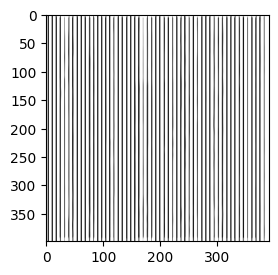

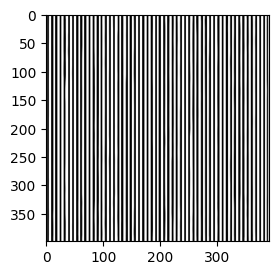

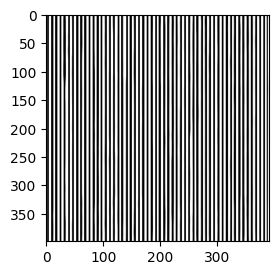

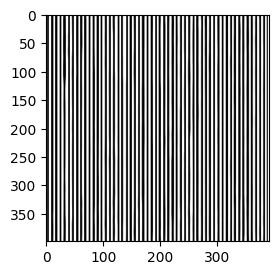

In [11]:
kernel_sizes = [10, 15]
sigmas = [6, 7, 8]
theta = 0
lambda_value = 5
gamma_value = 0.2 * 0.9
filtered_images = []
def apply_gabor(img, kernel_size, sigma, theta, lambda_value, gamma_value):
    kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, lambda_value, gamma_value, 0, ktype=cv2.CV_32F)
    return cv2.filter2D(img, cv2.CV_8UC3, kernel)


i = 0
for kernel_size in kernel_sizes:
    for sigma in sigmas:
        filtered_images += [apply_gabor(img, kernel_size, sigma, theta, lambda_value, gamma_value)]
        plt.figure(figsize=(10, 10))
        plt.subplot(3, 2, i+1)
        i += 1
        plt.imshow(filtered_images[-1], cmap='gray')
        plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش سوم: ذخیره‌سازی
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از اینکه گربه موجود در تصویر شناسایی شد، حال نوبت به آن است که تصویر خود را ذخیره کنید. دقت کنید که حتما تصویر را به حوزه رنگی RGB منتقل کنید و با نام زیر این تصویر را در کنار نوت‌بوک ذخیره کنید.
<br>
visible_cat.png
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله دوم: رفع نویز
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله با تصویری مواجه هستیم که دارای نویزهای زیادی می باشد اما در بین این نویزها تصویر یک فرد مشاهده می‌شود. قصد داریم تا با استفاده از فیلتر گابور بافت جسم این فرد را استخراج کنیم و نویزهای اضافی را تا حد امکان کاهش دهیم. در ادامه با عملیات‌های این مرحله آشنا خواهیم شد.
</font>
</p>

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش اول: وارد کردن تصویر
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدا تصویر را زیر را وارد کنید. دقت کنید که تصویر را در حوزه خاکستری باید بخوانید.
<br>
data/hidden.png
</font>
</p>

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش دوم: اعمال فیلتر گابور
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال باید یک فیلتر گابور را بر تصویر خود اعمال کنید. توجه کنید که فیلتر گابور دارای پارامترهای زیادی است. بخشی از پارامترها به واسطه ما تعیین شده اند. بخش دیگر برعهده شما است که مقدار آن را تعیین کنید و ببنید که با کدام ترکیب پارامترها بافت بدن انسان در تصویر باقی می ماند و نویزهای تصویر خیلی کم می شود.
</font>
</p>

$$\text{kernel size} = [15 \times 15, 30 \times 30]$$
$$\sigma = [6, 7, 8]$$
$$\theta = \pi/2$$
$$\lambda = 5$$
$$\gamma = 10$$

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش سوم: ذخیره‌سازی
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از اینکه جسم موجود در تصویر شناسایی شد، حال نوبت به آن است که تصویر خود را ذخیره کنید. دقت کنید که حتما تصویر را به حوزه رنگی RGB منتقل کنید و با نام زیر این تصویر را در کنار نوت‌بوک ذخیره کنید.
<br>
denoise_intruder.png
</font>
</p>

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 سلول جواب‌ساز
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بدون هیچگونه تغییری، این سلول را اجرا کنید تا فایل پاسخ شما آماده شود.
</font>
</p>

In [ ]:
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["notebook.ipynb", "visible_cat.png", "denoise_intruder.png"]
compress(file_names)